In [1]:
# Importing the required libraries
import pandas as pd
import sys
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [3]:
# Importing the data file
df = pd.read_csv("games.csv")

In [4]:
# Displaying the first few rows of the data
df.head()

,id,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
0,12333,boardgame,Twilight Struggle,2005.0,2.0,2.0,180.0,180.0,180.0,13.0,20113,8.33774,8.22186,26647,372,1219,5865,5347,2562,3.4785
1,120677,boardgame,Terra Mystica,2012.0,2.0,5.0,150.0,60.0,150.0,12.0,14383,8.28798,8.14232,16519,132,1586,6277,2526,1423,3.8939
2,102794,boardgame,Caverna: The Cave Farmers,2013.0,1.0,7.0,210.0,30.0,210.0,12.0,9262,8.28994,8.06886,12230,99,1476,5600,1700,777,3.7761
3,25613,boardgame,Through the Ages: A Story of Civilization,2006.0,2.0,4.0,240.0,240.0,240.0,12.0,13294,8.20407,8.05804,14343,362,1084,5075,3378,1642,4.1590
4,3076,boardgame,Puerto Rico,2002.0,2.0,5.0,150.0,90.0,150.0,12.0,39883,8.14261,8.04524,44362,795,861,5414,9173,5213,3.2943


In [5]:
#Displayin the shape of the data
df.shape

(81312, 20)

In [8]:
# % points summary of the data
df.describe()

,id,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
count,81312.000000,81309.000000,81309.000000,81309.000000,81309.000000,81309.000000,81309.000000,81309.000000,81312.000000,81312.000000,81312.000000,81312.000000,81312.000000,81312.000000,81312.000000,81312.000000,81312.000000,81312.000000
mean,72278.150138,1806.630668,1.992018,5.637703,51.634788,49.276833,51.634788,6.983975,161.886585,4.212144,1.157632,262.502509,9.236423,12.688890,42.719144,49.290031,16.488009,0.908083
std,58818.237742,588.517834,0.931034,56.076890,345.699969,334.483934,345.699969,5.035138,1145.978126,3.056551,2.340033,1504.536693,39.757408,60.764207,239.292628,284.862853,115.980285,1.176002
min,1.000000,-3500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21339.750000,1984.000000,2.000000,2.000000,8.000000,10.000000,8.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,43258.000000,2003.000000,2.000000,4.000000,30.000000,30.000000,30.000000,8.000000,2.000000,5.265620,0.000000,7.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
75%,128836.500000,2010.000000,2.000000,6.000000,60.000000,60.000000,60.000000,12.000000,16.000000,6.718777,0.000000,51.000000,2.000000,3.000000,7.000000,9.000000,2.000000,1.916700
max,184451.000000,2018.000000,99.000000,11299.000000,60120.000000,60120.000000,60120.000000,120.000000,53680.000000,10.000000,8.221860,73188.000000,1395.000000,1586.000000,6402.000000,11798.000000,5996.000000,5.000000


In [9]:
#Information regarding the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81312 entries, 0 to 81311
Data columns (total 20 columns):
id                      81312 non-null int64
type                    81312 non-null object
name                    81271 non-null object
yearpublished           81309 non-null float64
minplayers              81309 non-null float64
maxplayers              81309 non-null float64
playingtime             81309 non-null float64
minplaytime             81309 non-null float64
maxplaytime             81309 non-null float64
minage                  81309 non-null float64
users_rated             81312 non-null int64
average_rating          81312 non-null float64
bayes_average_rating    81312 non-null float64
total_owners            81312 non-null int64
total_traders           81312 non-null int64
total_wanters           81312 non-null int64
total_wishers           81312 non-null int64
total_comments          81312 non-null int64
total_weights           81312 non-null int64
average_weight  

In [7]:
#Checking for null values
df.isnull().sum()

id                       0
type                     0
name                    41
yearpublished            3
minplayers               3
maxplayers               3
playingtime              3
minplaytime              3
maxplaytime              3
minage                   3
users_rated              0
average_rating           0
bayes_average_rating     0
total_owners             0
total_traders            0
total_wanters            0
total_wishers            0
total_comments           0
total_weights            0
average_weight           0
dtype: int64

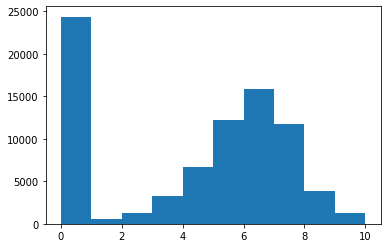

In [10]:
# Distribution of the target
plt.hist(df['average_rating'])
plt.show()

In [12]:
# check why there are occurences of huge amout of 0's
df[df['average_rating']==0]

,id,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
13048,318,boardgame,Looney Leo,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0,0,1,0,0,0.0
13068,579,boardgame,Field of Fire,2002.0,2.0,0.0,0.0,0.0,0.0,12.0,0,0.0,0.0,2,0,0,1,0,0,0.0
13114,894,boardgame,LifeLinks,2000.0,1.0,8.0,10.0,10.0,10.0,8.0,0,0.0,0.0,2,0,1,1,0,0,0.0
13116,897,boardgame,Dear Abby,1992.0,3.0,4.0,60.0,60.0,60.0,13.0,0,0.0,0.0,7,1,0,0,0,0,0.0
13124,946,boardgame,Rolazone,1999.0,2.0,2.0,30.0,30.0,30.0,0.0,0,0.0,0.0,0,0,0,3,0,0,0.0
13127,962,boardgame,Contango,2000.0,2.0,6.0,90.0,90.0,90.0,10.0,0,0.0,0.0,0,0,0,2,1,0,0.0
13169,1097,boardgame,Don't Give Up Your Day Job!,2000.0,6.0,41.0,120.0,120.0,120.0,8.0,0,0.0,0.0,0,0,0,2,0,0,0.0
13180,1151,boardgame,"Money, Power, Respect",2000.0,2.0,6.0,90.0,90.0,90.0,8.0,0,0.0,0.0,1,0,0,2,0,0,0.0
13181,1154,boardgame,Nuts! To You,1987.0,2.0,2.0,20.0,20.0,20.0,6.0,0,0.0,0.0,2,0,0,1,0,0,0.0
13188,1180,boardgame,Tower of Babylon,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,5,0,2,2,0,0,0.0


##### Inference:

The average rating is zero as there are users who have rated the games.

In [13]:
#check the occurences where th average rating is greater than 0
df[df['average_rating'] > 0]

,id,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
0,12333,boardgame,Twilight Struggle,2005.0,2.0,2.0,180.0,180.0,180.0,13.0,20113,8.33774,8.22186,26647,372,1219,5865,5347,2562,3.4785
1,120677,boardgame,Terra Mystica,2012.0,2.0,5.0,150.0,60.0,150.0,12.0,14383,8.28798,8.14232,16519,132,1586,6277,2526,1423,3.8939
2,102794,boardgame,Caverna: The Cave Farmers,2013.0,1.0,7.0,210.0,30.0,210.0,12.0,9262,8.28994,8.06886,12230,99,1476,5600,1700,777,3.7761
3,25613,boardgame,Through the Ages: A Story of Civilization,2006.0,2.0,4.0,240.0,240.0,240.0,12.0,13294,8.20407,8.05804,14343,362,1084,5075,3378,1642,4.1590
4,3076,boardgame,Puerto Rico,2002.0,2.0,5.0,150.0,90.0,150.0,12.0,39883,8.14261,8.04524,44362,795,861,5414,9173,5213,3.2943
5,31260,boardgame,Agricola,2007.0,1.0,5.0,150.0,30.0,150.0,12.0,39714,8.11957,8.03847,47522,837,958,6402,9310,5065,3.6160
6,124742,boardgame,Android: Netrunner,2012.0,2.0,2.0,45.0,45.0,45.0,14.0,15281,8.16760,7.97822,24381,680,627,3244,3202,1260,3.3103
7,96848,boardgame,Mage Knight Board Game,2011.0,1.0,4.0,150.0,150.0,150.0,14.0,12697,8.15901,7.96929,18769,367,1116,5427,2861,1409,4.1292
8,84876,boardgame,The Castles of Burgundy,2011.0,2.0,4.0,90.0,30.0,90.0,12.0,15461,8.07879,7.95011,20558,215,929,3681,3244,1176,3.0442
9,72125,boardgame,Eclipse,2011.0,2.0,6.0,200.0,60.0,200.0,14.0,15709,8.07933,7.93244,17611,273,1108,5581,3188,1486,3.6359


In [14]:
df = df[df['average_rating'] > 0]

In [16]:
df.isnull().sum()

id                       0
type                     0
name                    36
yearpublished            2
minplayers               2
maxplayers               2
playingtime              2
minplaytime              2
maxplaytime              2
minage                   2
users_rated              0
average_rating           0
bayes_average_rating     0
total_owners             0
total_traders            0
total_wanters            0
total_wishers            0
total_comments           0
total_weights            0
average_weight           0
dtype: int64

In [19]:
df.dropna(inplace=True)

In [20]:
df.shape

(56894, 20)

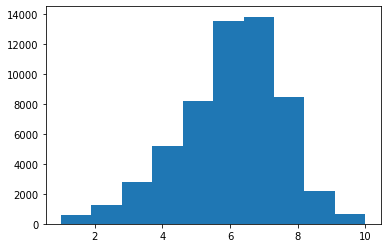

In [21]:
# Distribution of the target
plt.hist(df['average_rating'])
plt.show()

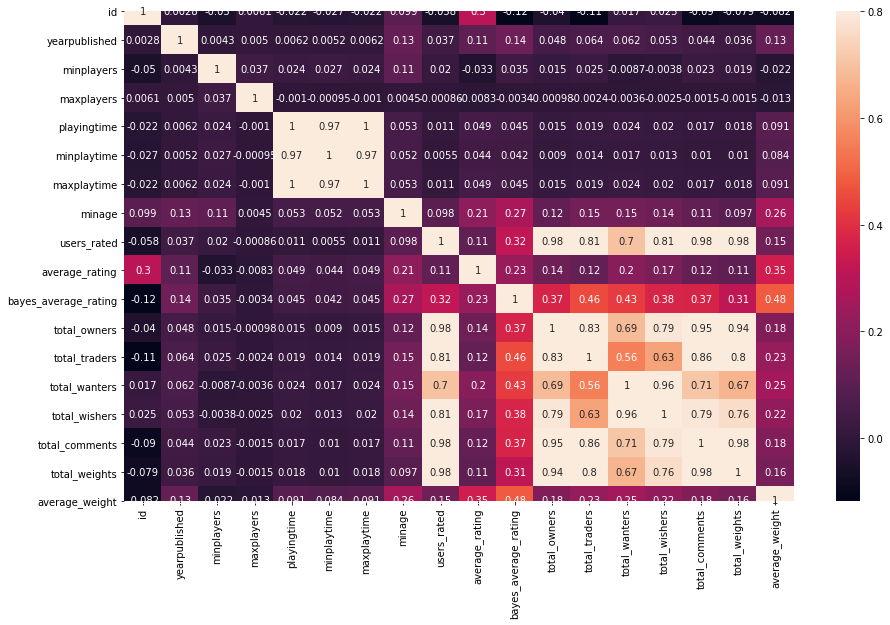

In [24]:
# Checking for multi collinearity

corremat = df.corr()
fig = plt.figure(figsize=(15,9))

sns.heatmap(corremat,annot=True,vmax=0.8,square=False)

In [46]:
columns = df.columns.tolist()

# Filter the columns to remove the columns which are correlated

columns = [c for c in columns if c not in ['bayes_average_rating',"type",'id','name','average_rating','total_owners','miniplaytime']]

# Target variable for which we are going to predict
target = "average_rating"

In [47]:
# Generate the training data

train = df.sample(frac=0.8,random_state=1)

test  = df.loc[~df.index.isin(train.index)]


print(train.shape)
print(test.shape)

(45515, 20)
(11379, 20)


In [48]:
# Linear model

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

linreg = LinearRegression()

# training the model
model = linreg.fit(train[columns],train[target])

In [49]:
# predictions

prediction = model.predict(test[columns])
print("Mean squared error",mean_squared_error(prediction,test[target]))
print("R square",r2_score(test[target],prediction))

Mean squared error 2.0952017637764806
R square 0.1595828314483112


## Random Forest

In [52]:
from sklearn.ensemble import RandomForestRegressor

RFR = RandomForestRegressor(n_estimators=200,min_samples_leaf=10,random_state=1)

model_RFR = RFR.fit(train[columns],train[target])

In [53]:
# predictions

prediction = model_RFR.predict(test[columns])
print("Mean squared error",mean_squared_error(prediction,test[target]))
print("R square",r2_score(test[target],prediction))

Mean squared error 1.477501753589577
R square 0.4073516633339491


In [57]:
rating_LR = model.predict(test[columns].iloc[0].values.reshape(1,-1))
rating_RFR = model_RFR.predict(test[columns].iloc[0].values.reshape(1,-1))

print(rating_LR)
print(rating_RFR)

[8.82244286]
[7.8600382]


In [59]:
print(test[target].iloc[0])

8.07933
